# About a company

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTnml1r1XbvYLIMQQpe7XVVbUnS5_rjJ8brAw&usqp=CAU)

Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company

# Questions for the analysis

1. What are some trends in smart device usage? 
2. How could these trends apply to Bellabeat customers? 
3. How could these trends help influence Bellabeat marketing strategy

# Business task

Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage.

# Loading packages

In [1]:
library(tidyverse) 
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Importing Datasets

For this project I am importing required datasets only from FitBit Fitness Tracker [Data](https://www.kaggle.com/arashnic/fitbit).

In [2]:
daily_activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
heartrate_seconds <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
sleepDay <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightLog <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2483658 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_

In [3]:
head(daily_activity)
head(heartrate_seconds)
head(sleepDay)
head(weightLog)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


I noticed some problems with the data. So, first I am going to correct them, before going to the analysis process.

# Data Cleaning

In [4]:
# daily_activity
daily_activity$ActivityDate <- as.POSIXct(daily_activity$ActivityDate, format = "%m/%d/%Y", tz=Sys.timezone())
daily_activity$date <- format(daily_activity$ActivityDate, format = "%m/%d/%y")
#heartrate_seconds
heartrate_seconds$Time <- as.POSIXct(heartrate_seconds$Time, format = "%m/%d/%Y %H:%M:%S %p",tz= Sys.timezone())
heartrate_seconds$date <- format(heartrate_seconds$Time , format = "%m/%d/%y")
heartrate_seconds$time <- format(heartrate_seconds$Time , format = "%H:%M:%S")
#sleepDay
sleepDay$SleepDay <- as.POSIXct(sleepDay$SleepDay, format = "%m/%d/%Y %H:%M:%S %p",tz= Sys.timezone())
sleepDay$date <- format(sleepDay$SleepDay , format = "%m/%d/%y")
sleepDay$time <- format(sleepDay$SleepDay , format = "%H:%M:%S")
#weightLog
weightLog$Date <- as.POSIXct(weightLog$Date, format = "%m/%d/%Y %H:%M:%S %p",tz= Sys.timezone())
weightLog$date <- format(weightLog$Date , format = "%m/%d/%y")
weightLog$time <- format(weightLog$Date , format = "%H:%M:%S")

In [5]:
head(daily_activity)
head(heartrate_seconds)
head(sleepDay)
head(weightLog)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/16
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/16
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/16
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/16
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/16
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,04/17/16


Id,Time,Value,date,time
<dbl>,<dttm>,<dbl>,<chr>,<chr>
2022484408,2016-04-12 07:21:00,97,04/12/16,07:21:00
2022484408,2016-04-12 07:21:05,102,04/12/16,07:21:05
2022484408,2016-04-12 07:21:10,105,04/12/16,07:21:10
2022484408,2016-04-12 07:21:20,103,04/12/16,07:21:20
2022484408,2016-04-12 07:21:25,101,04/12/16,07:21:25
2022484408,2016-04-12 07:22:05,95,04/12/16,07:22:05


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date,time
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1503960366,2016-04-12 12:00:00,1,327,346,04/12/16,12:00:00
1503960366,2016-04-13 12:00:00,2,384,407,04/13/16,12:00:00
1503960366,2016-04-15 12:00:00,1,412,442,04/15/16,12:00:00
1503960366,2016-04-16 12:00:00,2,340,367,04/16/16,12:00:00
1503960366,2016-04-17 12:00:00,1,700,712,04/17/16,12:00:00
1503960366,2016-04-19 12:00:00,1,304,320,04/19/16,12:00:00


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,date,time
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<chr>
1503960366,2016-05-02 11:59:59,52.6,115.9631,22,22.65,TRUE,1.462234e+12,05/02/16,11:59:59
1503960366,2016-05-03 11:59:59,52.6,115.9631,NA,22.65,TRUE,1.462320e+12,05/03/16,11:59:59
1927972279,2016-04-13 01:08:52,133.5,294.3171,NA,47.54,FALSE,1.460510e+12,04/13/16,01:08:52
2873212765,2016-04-21 11:59:59,56.7,125.0021,NA,21.45,TRUE,1.461283e+12,04/21/16,11:59:59
2873212765,2016-05-12 11:59:59,57.3,126.3249,NA,21.69,TRUE,1.463098e+12,05/12/16,11:59:59
4319703577,2016-04-17 11:59:59,72.4,159.6147,25,27.45,TRUE,1.460938e+12,04/17/16,11:59:59


In [6]:
n_distinct(daily_activity$Id)
n_distinct(heartrate_seconds$Id)
n_distinct(sleepDay$Id)
n_distinct(weightLog$Id)

[1] 33

[1] 14

[1] 24

[1] 8

From above results, it is clear the data of weightLog and hearrate_seconds is too less.I am not using them for any analysis and insights. Beacause insights from insufficient data may cause unreliable and misleading conclusions.

## Summary of each dataset

In [7]:
# daily_activity
daily_activity %>%
    select(TotalSteps,TotalDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories) %>%
    summary()
#sleepDay
sleepDay %>%
    select(TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed) %>%
    summary()

   TotalSteps    TotalDistance    VeryActiveMinutes LightlyActiveMinutes
 Min.   :    0   Min.   : 0.000   Min.   :  0.00    Min.   :  0.0       
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:  0.00    1st Qu.:127.0       
 Median : 7406   Median : 5.245   Median :  4.00    Median :199.0       
 Mean   : 7638   Mean   : 5.490   Mean   : 21.16    Mean   :192.8       
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.: 32.00    3rd Qu.:264.0       
 Max.   :36019   Max.   :28.030   Max.   :210.00    Max.   :518.0       
 SedentaryMinutes    Calories   
 Min.   :   0.0   Min.   :   0  
 1st Qu.: 729.8   1st Qu.:1828  
 Median :1057.5   Median :2134  
 Mean   : 991.2   Mean   :2304  
 3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :1440.0   Max.   :4900  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

**Basic insights from the summary**

* Most the time participants are sedentary
* Almost every participant having sleep once in a day
* The average calories burnt by participants is 2304

# Merging data

In [8]:
merged_data <- merge(daily_activity,sleepDay, by=c("Id","date"))
head(merged_data)

,Id,date,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,⋯,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,time
,<dbl>,<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>
1,1503960366,04/12/16,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,⋯,25,13,328,728,1985,2016-04-12 12:00:00,1,327,346,12:00:00
2,1503960366,04/13/16,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,⋯,21,19,217,776,1797,2016-04-13 12:00:00,2,384,407,12:00:00
3,1503960366,04/15/16,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,⋯,29,34,209,726,1745,2016-04-15 12:00:00,1,412,442,12:00:00
4,1503960366,04/16/16,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,⋯,36,10,221,773,1863,2016-04-16 12:00:00,2,340,367,12:00:00
5,1503960366,04/17/16,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,⋯,38,20,164,539,1728,2016-04-17 12:00:00,1,700,712,12:00:00
6,1503960366,04/19/16,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,⋯,50,31,264,775,2035,2016-04-19 12:00:00,1,304,320,12:00:00


# Data Analysis

#### **1.Daily_Activity**

In [9]:
#daily_acitvity
activity <- daily_activity %>%
    group_by(Id) %>%
    summarise(Avg_steps = mean(TotalSteps),Avg_very_active = mean(VeryActiveMinutes),Avg_light_active = mean(LightlyActiveMinutes),Avg_sedentary_min =mean(SedentaryMinutes),Avg_calories=mean(Calories))
head(activity)

Id,Avg_steps,Avg_very_active,Avg_light_active,Avg_sedentary_min,Avg_calories
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12116.742,38.7096774,219.93548,848.1613,1816.419
1624580081,5743.903,8.6774194,153.48387,1257.7419,1483.355
1644430081,7282.967,9.5666667,178.46667,1161.8667,2811.300
1844505072,2580.065,0.1290323,115.45161,1206.6129,1573.484
1927972279,916.129,1.3225806,38.58065,1317.4194,2172.806
2022484408,11370.645,36.2903226,257.45161,1112.5806,2509.968


#### **2.Sleepday**

In [10]:
#sleepday
sleep <- merged_data %>%
    select(Id,date,TotalSteps,VeryActiveMinutes,SedentaryMinutes,TotalMinutesAsleep,TotalTimeInBed) %>%
    group_by(Id) %>%
    summarise(Avg_steps = mean(TotalSteps),Avg_very_active = mean(VeryActiveMinutes),Avg_sedentary_min =mean(SedentaryMinutes),Avg_time_asleep=mean(TotalMinutesAsleep),Avg_time_sleep=mean(TotalTimeInBed))
head(sleep)
    

Id,Avg_steps,Avg_very_active,Avg_sedentary_min,Avg_time_asleep,Avg_time_sleep
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12405.680,37.9200000,759.2800,360.2800,383.2000
1644430081,7967.750,2.5000000,920.5000,294.0000,346.0000
1844505072,3477.000,0.0000000,443.3333,652.0000,961.0000
1927972279,1490.000,0.0000000,977.2000,417.0000,437.8000
2026352035,5618.679,0.1071429,653.9643,506.1786,537.6429
2320127002,5079.000,0.0000000,1129.0000,61.0000,69.0000


#### **3.Type of users per activity level**

Let's try to categorize people based on activity level

We can categorize users as follows:

* Sedentary - Less than 5000 steps a day.
* Lightly active - Between 5000 and 7499 steps a day.
* Fairly active - Between 7500 and 9999 steps a day.
* Very active - More than 10000 steps a day.


First we will catogerise the people

In [11]:
user_type <- activity %>%
  mutate(user_type = case_when(
    Avg_steps < 5000 ~ "sedentary",
    Avg_steps >= 5000 & Avg_steps < 7499 ~ "lightly active", 
    Avg_steps >= 7500 & Avg_steps < 9999 ~ "fairly active", 
    Avg_steps >= 10000 ~ "very active"
  ))
user_type1 <- user_type
head(user_type)

Id,Avg_steps,Avg_very_active,Avg_light_active,Avg_sedentary_min,Avg_calories,user_type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12116.742,38.7096774,219.93548,848.1613,1816.419,very active
1624580081,5743.903,8.6774194,153.48387,1257.7419,1483.355,lightly active
1644430081,7282.967,9.5666667,178.46667,1161.8667,2811.300,lightly active
1844505072,2580.065,0.1290323,115.45161,1206.6129,1573.484,sedentary
1927972279,916.129,1.3225806,38.58065,1317.4194,2172.806,sedentary
2022484408,11370.645,36.2903226,257.45161,1112.5806,2509.968,very active


Now let's find out the percentage of each category

In [12]:
user_type_percentage1 <- user_type1 %>%
    group_by(user_type) %>%
    summarise(total = n()) %>%
    mutate(totals = sum(total)) %>%
    group_by(user_type) %>%
    summarise(percentage = total/totals) %>%
    mutate(labels = scales::percent(percentage))


user_type_percentage1

user_type,percentage,labels
<chr>,<dbl>,<chr>
fairly active,0.2727273,27.3%
lightly active,0.2727273,27.3%
sedentary,0.2424242,24.2%
very active,0.2121212,21.2%


In [13]:
user_type_percentage <- user_type1 %>%
    group_by(user_type) %>%
    summarise(total = n()) %>%
    mutate(totals = sum(total)) %>%
    group_by(user_type) %>%
    summarise(percentage = total/totals) %>%
    mutate(labels = scales::percent(percentage))

user_type_percentage$user_type <- factor(user_type_percentage$user_type,levels = c("very active", "fairly active", "lightly active", "sedentary"))

user_type_percentage

user_type,percentage,labels
<fct>,<dbl>,<chr>
fairly active,0.2727273,27.3%
lightly active,0.2727273,27.3%
sedentary,0.2424242,24.2%
very active,0.2121212,21.2%


# Visualizations

* I assume or it is usual that as the number of steps increases the calories burnt also increase. Let's find out through visualizations.

#### **TotalSteps vs Avg_calories**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


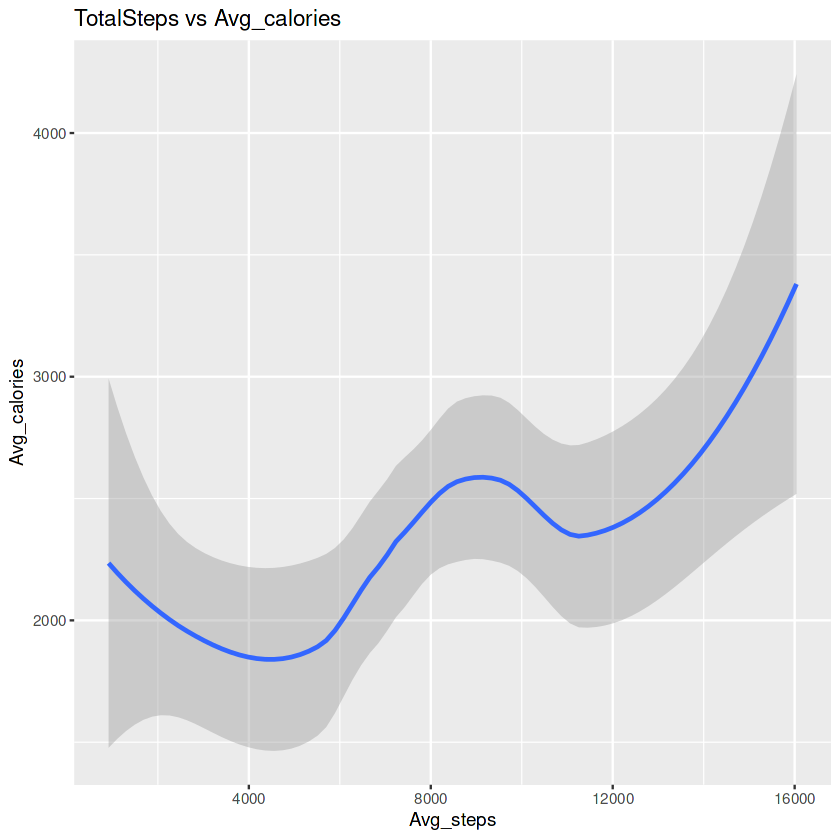

In [14]:
# DailyActivity
activity %>%
    ggplot(aes(x=Avg_steps,y=Avg_calories)) + 
    geom_smooth() +
    labs(title = "TotalSteps vs Avg_calories")

As a contrast to my assumption the graph is not always increasing with increase in steps.
* From we can conclude that above 11000 steps, as the participants walk more means they burn more calories.

#### **TotalSteps vs Avg_very_active**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


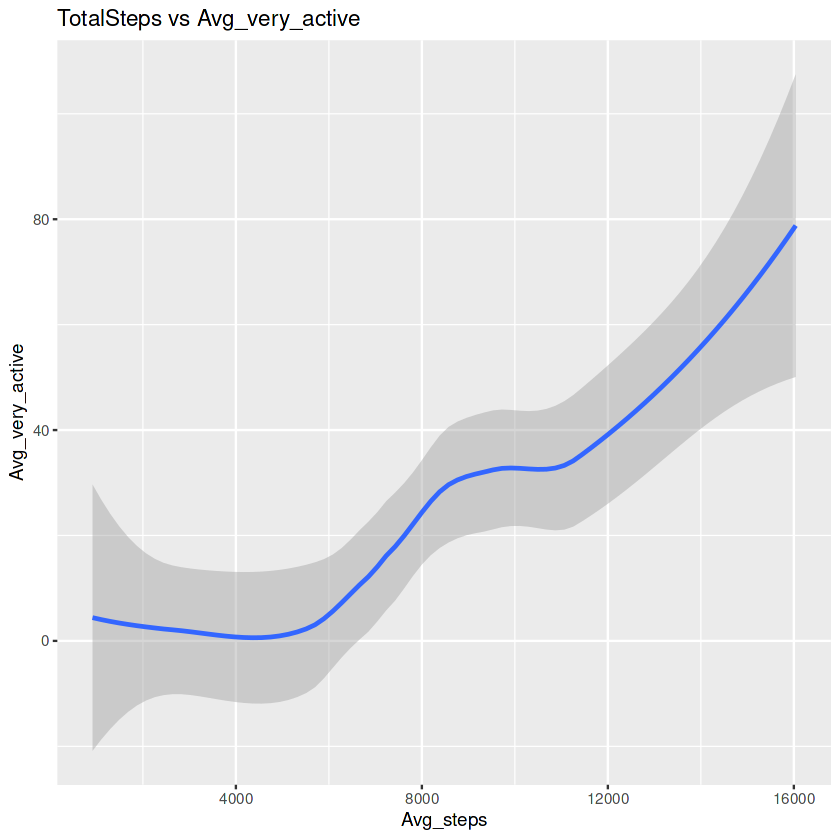

In [15]:
# DailyActivity
activity   %>%
    ggplot(aes(x=Avg_steps,y=Avg_very_active)) + 
    geom_smooth() +
    labs(title = "TotalSteps vs Avg_very_active")

From above it is clear that a linear relationship exists between the amount of time the particpants are very active and the steps they walk.
By this we can conclude that:
* People who walk more, are very active for a long time.
* People who are very active for a long time, walk/work more.

#### **TotalSteps vs Avg_sedentary_min**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


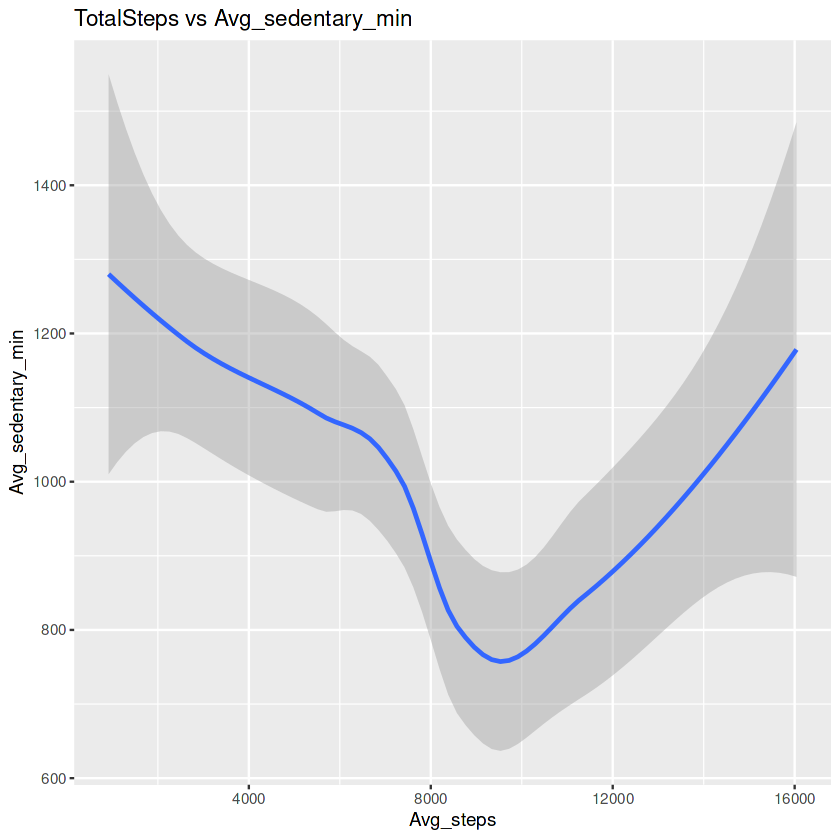

In [16]:
#DailyActivity
activity %>%
    ggplot(aes(x=Avg_steps,y=Avg_sedentary_min)) + 
    geom_smooth() +
    labs(title = "TotalSteps vs Avg_sedentary_min")

1. The person who are walking less than 8000 steps and above 120000 daily are less active and sedentary.
2. It is recomended to walk between 8000 to 12000 steps daily.

#### **Sleep time of people**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


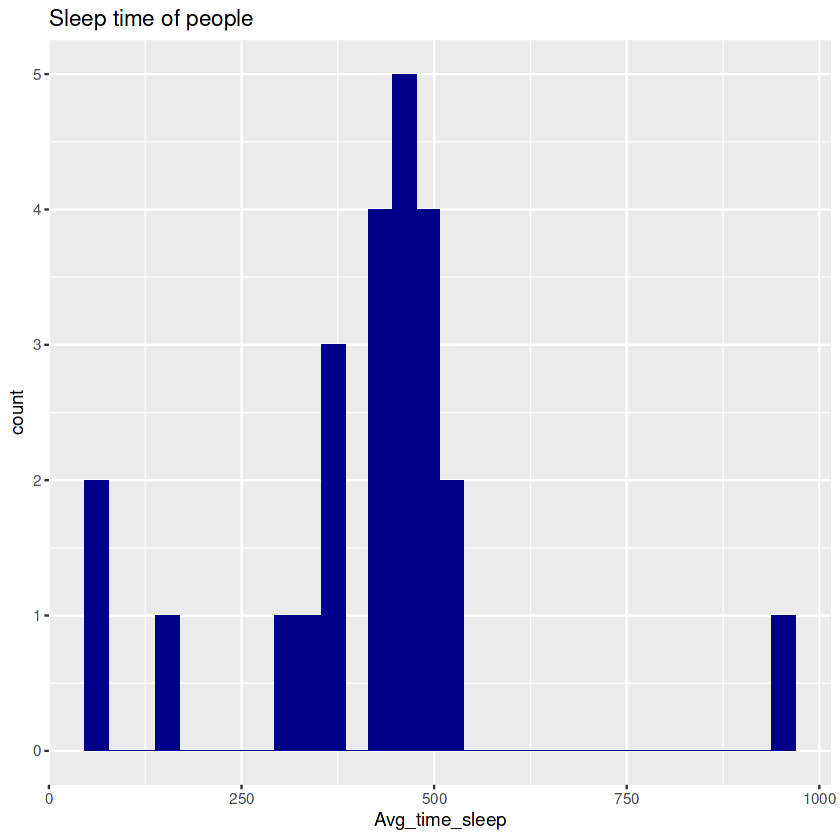

In [17]:
sleep %>%
    ggplot(aes(x=Avg_time_sleep))+
    geom_histogram(fill='darkblue') + 
    labs(title="Sleep time of people")

I observe most participants are sleeping in the range of 350 to 525 minutes a day, which is not a good thing.

Let's analyse the reason.

#### **VeryActiveMinutes Vs TotalTimeInBed**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


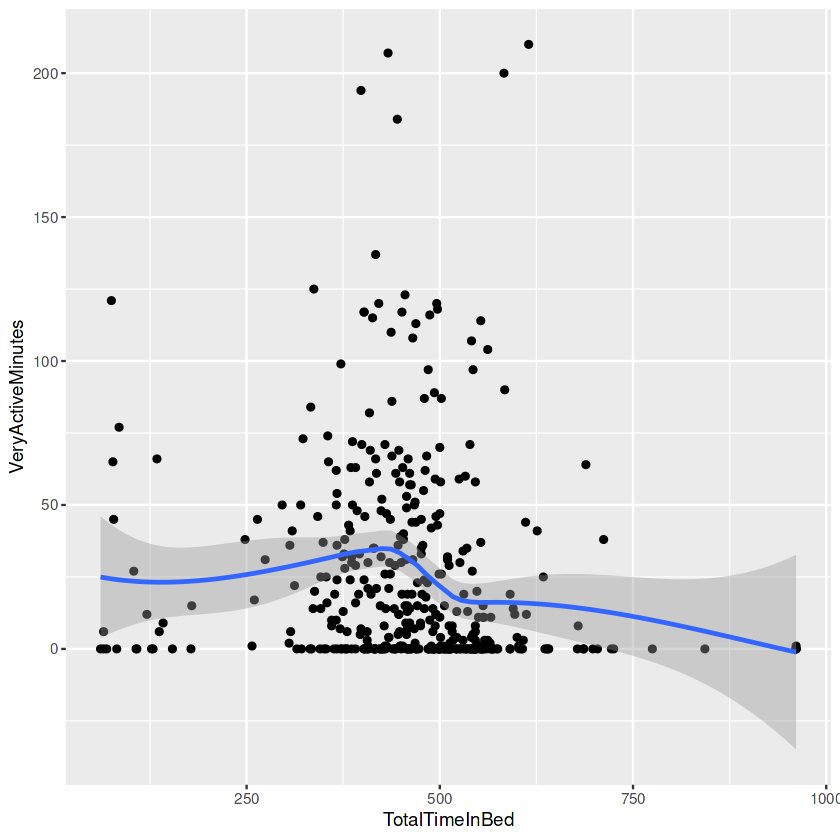

In [18]:
merged_data %>%
    ggplot(aes(x=TotalTimeInBed,y=VeryActiveMinutes))+
    geom_point() +
    geom_smooth() 

People who are very active and working for a long time are having TotalTimeInBed of range 375 to 525 minutes.

From this I conlude that who are very active and working for a long time are neglecting sleep, which may cause health issues.

#### **Share of each type of people**

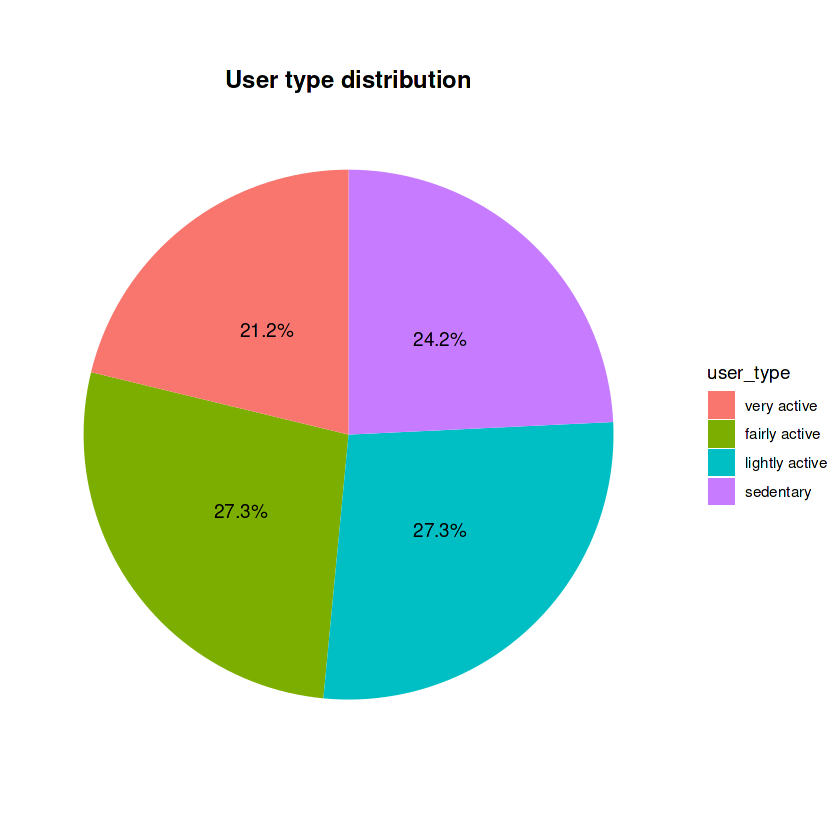

In [19]:
user_type_percentage %>%
    ggplot(aes(x="",y=percentage,fill = user_type)) +
    geom_bar(stat = "identity",width =1) +
    coord_polar("y",start = 0) +
    theme_minimal() +
    theme(axis.title.x= element_blank(),
          axis.title.y = element_blank(),
          axis.ticks = element_blank(),
          panel.grid = element_blank(), 
          plot.title = element_text(hjust = 0.5, size=14, face = "bold"),
          axis.text.x = element_blank())+
    geom_text(aes(label = labels),position = position_stack(vjust = 0.5))+
    labs(title="User type distribution")


# Summarizing the insights and recommendations for the company


![](https://imagedelivery.net/6fPUSNcQhoEe4ndYlFOD6w/326ac096-0bff-4150-b4f4-1f9ceb602e00/email600)

* After 11000 steps there is a linear correlation between steps and calories burnt. So, the company should include a target steps of 11000 or above and minimal rewards or vouchers inorder to motivate the participants to burn more calories.

* Participants who very active for a long time are working a lot and neglecting sleep, which have consequences of health issues. So, there should monitering of sufficient sleep for a person by gadget. And recommending to sleep when ever necessary.

* By the visualizations I assume that most of the participants are working professionals and negelecting their health due to heavy work. 

* It is also clear that the participants are busy at the day time and free only in the evenigns.

* So, I recommend the company to promote about the healt care the women should take and about the advantages and features of thier products in the evenings.

* We can also observe that most people are either fairly active or lightly active. So, we should focus more on them and convert them into very active persons.

Thankyou for visiting my Case study. This is my first project on Data analysis.

I am happy to receive any suggestions and recommendations from you.